In [81]:
!pip install scikit-learn-extra
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage

sns.set()

# KMEANS Pagi Program

In [82]:
df_merged = pd.read_csv("new_rush_hour_pagi.csv",  delimiter=";") # Data_merged_filtered_2, new_rush_hour_pagi
df_merged.head()

,corridor_name,shelter_name,number_of_transaction
0,BLOK M - KOTA,ASEAN,33500
1,BLOK M - KOTA,BENDUNGAN HILIR,9428
2,BLOK M - KOTA,BLOK M,131797
3,BLOK M - KOTA,BUNDARAN HI ASTRA,148054
4,BLOK M - KOTA,BUNDARAN SENAYAN,84103


In [5]:
df_merged["corridor_name"].unique()

array(['BLOK M - KOTA', 'KALIDERES - PASAR BARU', 'LEBAK BULUS - HARMONI',
       'PULOGADUNG 1 - HARMONI', nan], dtype=object)

## Feature Engginering

In [6]:
label_encoder = LabelEncoder()
df_merged['corridor_name_encoded'] = label_encoder.fit_transform(df_merged['corridor_name'])

df_merged.sample(n=5, random_state=42)

,corridor_name,shelter_name,number_of_transaction,corridor_name_encoded
4,BLOK M - KOTA,BUNDARAN SENAYAN,84103,0
63,PULOGADUNG 1 - HARMONI,PASAR CEMPAKA PUTIH,71569,3
10,BLOK M - KOTA,KOTA,174282,0
0,BLOK M - KOTA,ASEAN,33500,0
35,LEBAK BULUS - HARMONI,KEBON JERUK,98460,2


In [7]:
label_encoder.classes_

array(['BLOK M - KOTA', 'KALIDERES - PASAR BARU', 'LEBAK BULUS - HARMONI',
       'PULOGADUNG 1 - HARMONI', nan], dtype=object)

In [8]:
df_merged['shelter_name'].unique()

array(['ASEAN', 'BENDUNGAN HILIR', 'BLOK M', 'BUNDARAN HI ASTRA',
       'BUNDARAN SENAYAN', 'DUKUH ATAS', 'GLODOK', 'KARET',
       'KEBON SIRIH ARAH KOTA', 'KEJAKSAAN AGUNG', 'KOTA',
       'MANGGA BESAR ARAH KOTA', 'MASJID AGUNG', 'MH THAMRIN',
       'MONUMEN NASIONAL', 'POLDA METRO JAYA', 'SENAYAN BANK DKI',
       'TAMAN SARI', 'TELUK BETUNG', 'DAMAI', 'GROGOL', 'JELAMBAR',
       'JEMBATAN BARU', 'JEMBATAN GANTUNG', 'KALIDERES', 'PASAR BARU',
       'PESAKIH', 'PULO NANGKA', 'RAWA BUAYA', 'ROXY', 'SUMUR BOR',
       'TAMAN KOTA', 'DURI KEPA', 'GROGOL II', 'KEBAYORAN LAMA BUNGUR',
       'KEBON JERUK', 'KEDOYA ASSIDIQQIYAH', 'KEDOYA GREEN GARDEN',
       'KELAPA DUA SASAK', 'LEBAK BULUS', 'PERMATA HIJAU',
       'PERMATA HIJAU RS MEDIKA', 'PETOJO', 'PONDOK INDAH I',
       'PONDOK INDAH II', 'PONDOK PINANG', 'POS PENGUMBEN',
       'PS.KEBAYORAN LAMA', 'RS TARAKAN',
       'S. PARMAN PODOMORO CITY ARAH PLUIT', 'SIMPRUG',
       'TANAH KUSIR KODIM', 'TOMANG MANDALA', 'BALAI KOTA',

In [9]:
# shelter_dummies = pd.get_dummies(df_merged['shelter_name_var'], prefix='shelter', drop_first=False)
# shelter_dummies = shelter_dummies.astype(int)

# df_merged = pd.concat([df_merged, shelter_dummies], axis=1)

# # label_encoder = LabelEncoder()
# # df_merged['shelter_name_encoded'] = label_encoder.fit_transform(df_merged['shelter_name_var'])

# df_merged.sample(n=10, random_state=42)

In [10]:
label_encoder = LabelEncoder()
df_merged['shelter_name_encoded'] = label_encoder.fit_transform(df_merged['shelter_name'])

df_merged.sample(n=10, random_state=42)

,corridor_name,shelter_name,number_of_transaction,corridor_name_encoded,shelter_name_encoded
4,BLOK M - KOTA,BUNDARAN SENAYAN,84103,0,6
63,PULOGADUNG 1 - HARMONI,PASAR CEMPAKA PUTIH,71569,3,40
10,BLOK M - KOTA,KOTA,174282,0,32
0,BLOK M - KOTA,ASEAN,33500,0,0
35,LEBAK BULUS - HARMONI,KEBON JERUK,98460,2,26
61,PULOGADUNG 1 - HARMONI,JUANDA,539109,3,22
28,KALIDERES - PASAR BARU,RAWA BUAYA,270371,1,59
12,BLOK M - KOTA,MASJID AGUNG,55300,0,36
69,PULOGADUNG 1 - HARMONI,PULO GADUNG,602937,3,56
64,PULOGADUNG 1 - HARMONI,PASAR SENEN,46120,3,41


In [11]:
# # Tidak sibuk dan Sore tidak di pakai dulu

# label_encoder_rush = LabelEncoder()
# df_merged['rush_hour_encoded'] = label_encoder_rush.fit_transform(df_merged['rush_hour'])

# df_merged_filtered = df_merged[df_merged['rush_hour_encoded'] != 2]
# df_merged_filtered = df_merged_filtered[df_merged_filtered['rush_hour_encoded'] != 1]

# df_merged_filtered.reset_index(drop=True, inplace=True)

In [ ]:
# df_merged_filtered.sample(n=10, random_state=42)

In [12]:
df_merged.shape # df_merged

(75, 5)

## Modeling

In [13]:
X = pd.concat([df_merged['shelter_name_encoded'].reset_index(drop=True), df_merged['number_of_transaction'].reset_index(drop=True)], axis=1)
X = X.sample(frac=1, random_state=42).reset_index(drop=True)

scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

X = pd.DataFrame(X_normalized, columns=X.columns)

X.head()

,shelter_name_encoded,number_of_transaction
0,0.081081,0.119962
1,0.540541,0.101635
2,0.432432,0.251815
3,0.000000,0.045974
4,0.351351,0.140953


In [14]:
print(f"X Shape {X.shape}")
print(f"Full Features {df_merged.shape}")

X Shape (75, 2)
Full Features (75, 5)


In [15]:
sse = []

# Coba k dari 1 sampai 10

k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

In [ ]:
print(sse)

[8.814121483755653, 3.976686564870328, 2.431119993164262, 1.477881680516783, 1.1210004958656195, 0.9055793608583214, 0.7597476531581884, 0.6134825095202074, 0.5349739228050767, 0.4533847337848807]


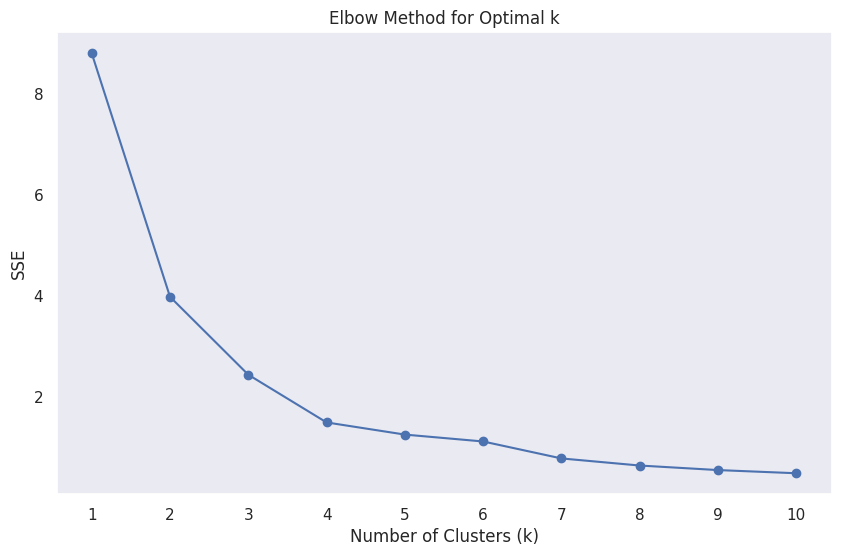

In [16]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, sse, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('SSE')
plt.xticks(k_values)
plt.grid()
plt.show()

In [17]:
optimal_k = 3 # 4

kmeans = KMeans(n_clusters=optimal_k, max_iter=10, random_state=42)
labels = kmeans.fit_predict(X)
centroids = kmeans.cluster_centers_

X['cluster'] = labels
df_merged['cluster'] = labels

# df_merged_filtered['cluster'] = labels

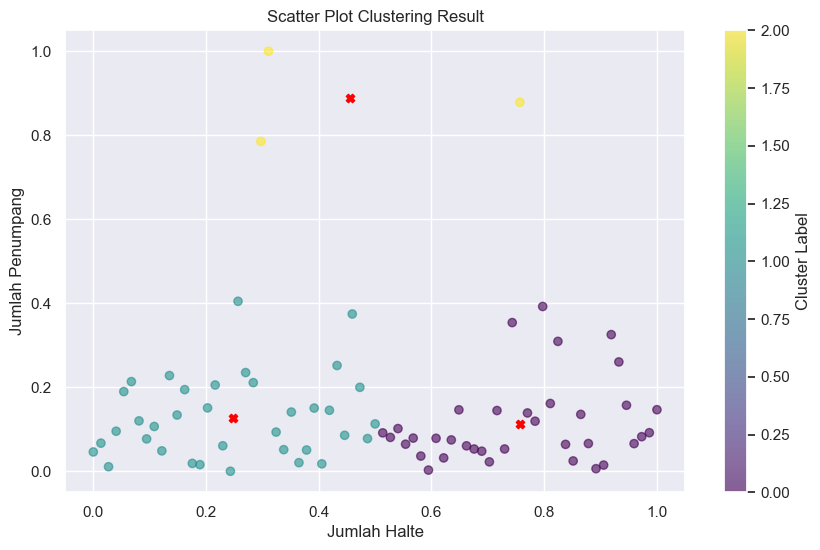

In [ ]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
        X['shelter_name_encoded'],
        X['number_of_transaction'],
          c=X['cluster'],
          cmap='viridis',
          alpha=0.6)

plt.scatter(centroids[:, 0],
          centroids[:, 1],
          c='red',
          marker="X",
          label="Centroids")

plt.xlabel('Jumlah Halte')
plt.ylabel('Jumlah Penumpang')

cbar = plt.colorbar(scatter)
cbar.set_label('Cluster Label')

plt.title("Scatter Plot Clustering Result")
plt.show()

In [18]:
df_merged.head()

,corridor_name,shelter_name,number_of_transaction,corridor_name_encoded,shelter_name_encoded,cluster
0,BLOK M - KOTA,ASEAN,33500,0,0,1
1,BLOK M - KOTA,BENDUNGAN HILIR,9428,0,2,0
2,BLOK M - KOTA,BLOK M,131797,0,4,1
3,BLOK M - KOTA,BUNDARAN HI ASTRA,148054,0,5,1
4,BLOK M - KOTA,BUNDARAN SENAYAN,84103,0,6,1


In [19]:
sse_final = kmeans.inertia_
silhouette_avg = silhouette_score(X, X['cluster'])
dbi = davies_bouldin_score(X, X['cluster'])

print(f"SSE: {sse_final}")
print(f"Silhouette Score: {silhouette_avg}")
print(f"Davies-Bouldin Index: {dbi}")
print(f"Data Index: {df_merged.shape}")

SSE: 2.4311199931642626
Silhouette Score: 0.7984341036703452
Davies-Bouldin Index: 0.3026598644037634
Data Index: (75, 6)


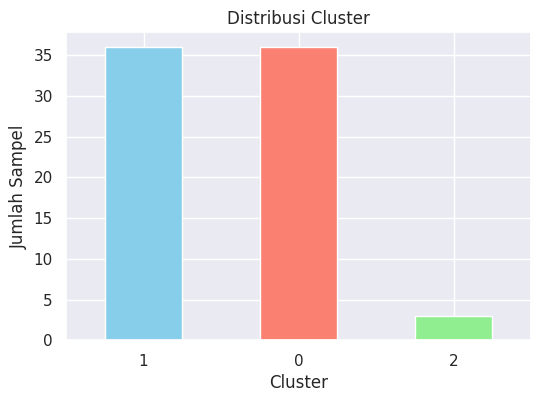

In [20]:
plt.figure(figsize=(6, 4))
df_merged['cluster'].value_counts().plot(kind='bar', color=['skyblue', 'salmon', 'lightgreen', 'gold'])
plt.title('Distribusi Cluster')
plt.xlabel('Cluster')
plt.ylabel('Jumlah Sampel')
plt.xticks(rotation=0)
plt.show()

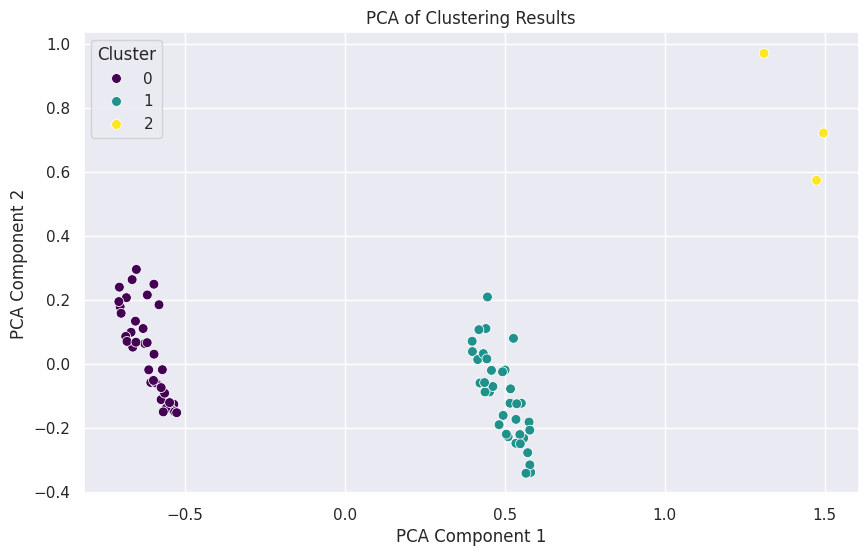

In [21]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

df_pca = pd.DataFrame(data=X_pca, columns=['PCA1', 'PCA2'])
df_pca['cluster'] = labels

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_pca, x='PCA1', y='PCA2', hue='cluster', palette='viridis', s=50)
plt.title('PCA of Clustering Results')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

In [22]:
# Menyimpan data hasil clustering
df_merged = df_merged.drop(columns=['corridor_name_encoded', 'shelter_name_encoded'])
df_merged.to_csv("kmeans_pagi_result.csv", index=False)

# KMEANS Sore PROGRAM

In [25]:
df_merged = pd.read_csv("new_rush_hour_sore.csv",  delimiter=";") # Data_merged_filtered_2
df_merged.head()

,corridor_name,shelter_name,number_of_transaction
0,BLOK M - KOTA,ASEAN,107803
1,BLOK M - KOTA,BENDUNGAN HILIR,41520
2,BLOK M - KOTA,BLOK M,357745
3,BLOK M - KOTA,BUNDARAN HI ASTRA,488951
4,BLOK M - KOTA,BUNDARAN SENAYAN,434460


In [26]:
df_merged["corridor_name"].unique()

array(['BLOK M - KOTA', 'KALIDERES - PASAR BARU', 'LEBAK BULUS - HARMONI',
       'PULOGADUNG 1 - HARMONI'], dtype=object)

## Feature Engginering

In [27]:
label_encoder = LabelEncoder()
df_merged['corridor_name_encoded'] = label_encoder.fit_transform(df_merged['corridor_name'])

df_merged.sample(n=5, random_state=42)

,corridor_name,shelter_name,number_of_transaction,corridor_name_encoded
4,BLOK M - KOTA,BUNDARAN SENAYAN,434460,0
63,PULOGADUNG 1 - HARMONI,PASAR CEMPAKA PUTIH,39556,3
10,BLOK M - KOTA,KOTA,205466,0
0,BLOK M - KOTA,ASEAN,107803,0
35,LEBAK BULUS - HARMONI,KEBON JERUK,124462,2


In [28]:
label_encoder.classes_

array(['BLOK M - KOTA', 'KALIDERES - PASAR BARU', 'LEBAK BULUS - HARMONI',
       'PULOGADUNG 1 - HARMONI'], dtype=object)

In [29]:
df_merged['shelter_name'].unique()

array(['ASEAN', 'BENDUNGAN HILIR', 'BLOK M', 'BUNDARAN HI ASTRA',
       'BUNDARAN SENAYAN', 'DUKUH ATAS', 'GLODOK', 'KARET',
       'KEBON SIRIH ARAH KOTA', 'KEJAKSAAN AGUNG', 'KOTA',
       'MANGGA BESAR ARAH KOTA', 'MASJID AGUNG', 'MH THAMRIN',
       'MONUMEN NASIONAL', 'POLDA METRO JAYA', 'SENAYAN BANK DKI',
       'TAMAN SARI', 'TELUK BETUNG', 'DAMAI', 'GROGOL', 'JELAMBAR',
       'JEMBATAN BARU', 'JEMBATAN GANTUNG', 'KALIDERES', 'PASAR BARU',
       'PESAKIH', 'PULO NANGKA', 'RAWA BUAYA', 'ROXY', 'SUMUR BOR',
       'TAMAN KOTA', 'DURI KEPA', 'GROGOL II', 'KEBAYORAN LAMA BUNGUR',
       'KEBON JERUK', 'KEDOYA ASSIDIQQIYAH', 'KEDOYA GREEN GARDEN',
       'KELAPA DUA SASAK', 'LEBAK BULUS', 'PERMATA HIJAU',
       'PERMATA HIJAU RS MEDIKA', 'PETOJO', 'PONDOK INDAH I',
       'PONDOK INDAH II', 'PONDOK PINANG', 'POS PENGUMBEN',
       'PS.KEBAYORAN LAMA', 'RS TARAKAN',
       'S. PARMAN PODOMORO CITY ARAH PLUIT', 'SIMPRUG',
       'TANAH KUSIR KODIM', 'TOMANG MANDALA', 'BALAI KOTA',

In [30]:
label_encoder = LabelEncoder()
df_merged['shelter_name_encoded'] = label_encoder.fit_transform(df_merged['shelter_name'])

df_merged.sample(n=10, random_state=42)

,corridor_name,shelter_name,number_of_transaction,corridor_name_encoded,shelter_name_encoded
4,BLOK M - KOTA,BUNDARAN SENAYAN,434460,0,6
63,PULOGADUNG 1 - HARMONI,PASAR CEMPAKA PUTIH,39556,3,40
10,BLOK M - KOTA,KOTA,205466,0,32
0,BLOK M - KOTA,ASEAN,107803,0,0
35,LEBAK BULUS - HARMONI,KEBON JERUK,124462,2,26
61,PULOGADUNG 1 - HARMONI,JUANDA,282951,3,22
28,KALIDERES - PASAR BARU,RAWA BUAYA,127477,1,59
12,BLOK M - KOTA,MASJID AGUNG,95578,0,36
69,PULOGADUNG 1 - HARMONI,PULO GADUNG,197357,3,56
64,PULOGADUNG 1 - HARMONI,PASAR SENEN,73053,3,41


In [31]:
df_merged.shape

(75, 5)

## Modeling

In [32]:
X = pd.concat([df_merged['shelter_name_encoded'].reset_index(drop=True), df_merged['number_of_transaction'].reset_index(drop=True)], axis=1)
X = X.sample(frac=1, random_state=42).reset_index(drop=True)

scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

X = pd.DataFrame(X_normalized, columns=X.columns)

X.head()

,shelter_name_encoded,number_of_transaction
0,0.081081,0.575139
1,0.540541,0.039015
2,0.432432,0.264256
3,0.000000,0.131668
4,0.351351,0.154284


In [33]:
sse = []

# Coba k dari 1 sampai 10

k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

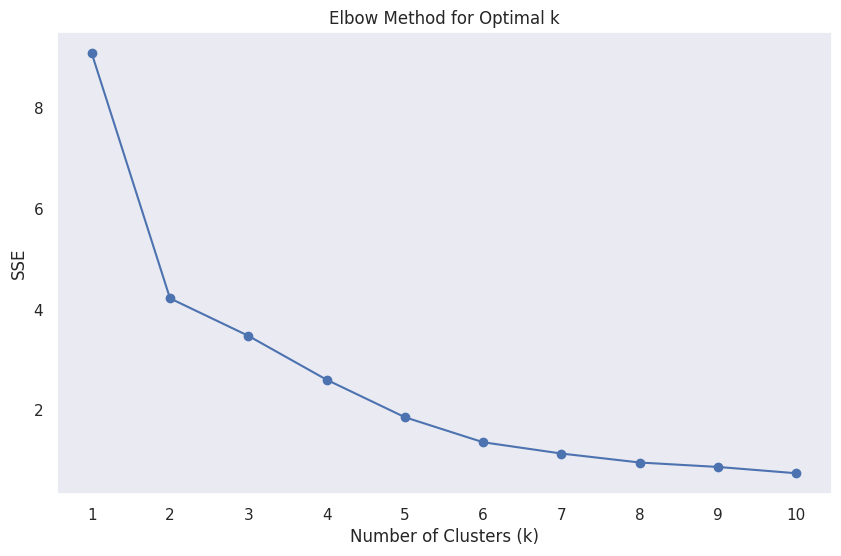

In [34]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, sse, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('SSE')
plt.xticks(k_values)
plt.grid()
plt.show()

In [35]:
optimal_k = 3 # 4

kmeans = KMeans(n_clusters=optimal_k, max_iter=10, random_state=42)
labels = kmeans.fit_predict(X)
centroids = kmeans.cluster_centers_

X['cluster'] = labels
df_merged['cluster'] = labels

In [36]:
df_merged.head()

,corridor_name,shelter_name,number_of_transaction,corridor_name_encoded,shelter_name_encoded,cluster
0,BLOK M - KOTA,ASEAN,107803,0,0,1
1,BLOK M - KOTA,BENDUNGAN HILIR,41520,0,2,0
2,BLOK M - KOTA,BLOK M,357745,0,4,2
3,BLOK M - KOTA,BUNDARAN HI ASTRA,488951,0,5,1
4,BLOK M - KOTA,BUNDARAN SENAYAN,434460,0,6,1


In [37]:
sse_final = kmeans.inertia_
silhouette_avg = silhouette_score(X, X['cluster'])
dbi = davies_bouldin_score(X, X['cluster'])

print(f"SSE: {sse_final}")
print(f"Silhouette Score: {silhouette_avg}")
print(f"Davies-Bouldin Index: {dbi}")
print(f"Data Index: {df_merged.shape}")

SSE: 3.480800817849389
Silhouette Score: 0.7769662576362628
Davies-Bouldin Index: 0.3556662643724909
Data Index: (75, 6)


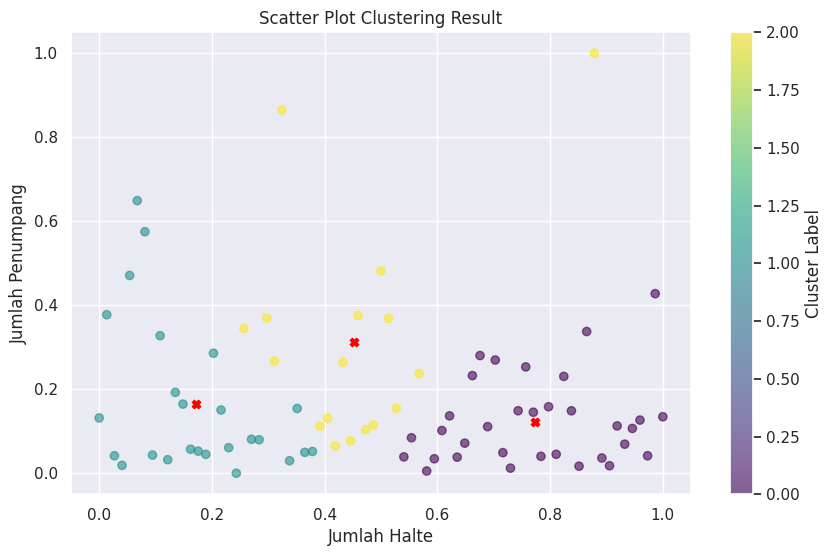

In [38]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
        X['shelter_name_encoded'],
        X['number_of_transaction'],
          c=X['cluster'],
          cmap='viridis',
          alpha=0.6)

plt.scatter(centroids[:, 0],
          centroids[:, 1],
          c='red',
          marker="X",
          label="Centroids")

plt.xlabel('Jumlah Halte')
plt.ylabel('Jumlah Penumpang')

cbar = plt.colorbar(scatter)
cbar.set_label('Cluster Label')

plt.title("Scatter Plot Clustering Result")
plt.show()

In [39]:
df_merged.head()

,corridor_name,shelter_name,number_of_transaction,corridor_name_encoded,shelter_name_encoded,cluster
0,BLOK M - KOTA,ASEAN,107803,0,0,1
1,BLOK M - KOTA,BENDUNGAN HILIR,41520,0,2,0
2,BLOK M - KOTA,BLOK M,357745,0,4,2
3,BLOK M - KOTA,BUNDARAN HI ASTRA,488951,0,5,1
4,BLOK M - KOTA,BUNDARAN SENAYAN,434460,0,6,1


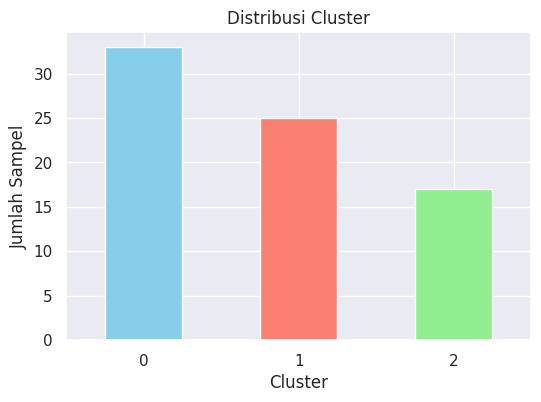

In [40]:
plt.figure(figsize=(6, 4))
df_merged['cluster'].value_counts().plot(kind='bar', color=['skyblue', 'salmon', 'lightgreen', 'gold'])
plt.title('Distribusi Cluster')
plt.xlabel('Cluster')
plt.ylabel('Jumlah Sampel')
plt.xticks(rotation=0)
plt.show()

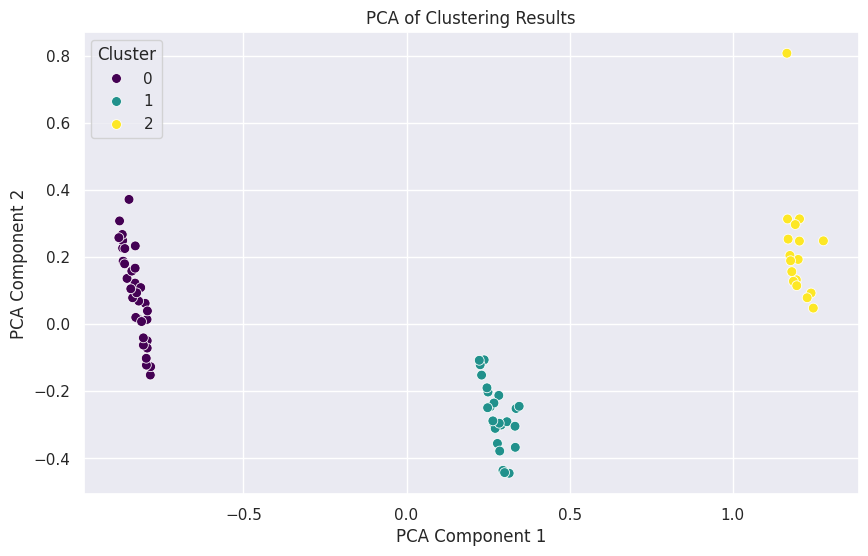

In [41]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

df_pca = pd.DataFrame(data=X_pca, columns=['PCA1', 'PCA2'])
df_pca['cluster'] = labels

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_pca, x='PCA1', y='PCA2', hue='cluster', palette='viridis', s=50)
plt.title('PCA of Clustering Results')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

In [42]:
df_merged = df_merged.drop(columns=['corridor_name_encoded', 'shelter_name_encoded'])
df_merged.to_csv("kmeans_sore_result.csv", index=False)

# KMEDOITS PAGI PROGRAM

In [45]:
df_merged = pd.read_csv("new_rush_hour_pagi.csv",  delimiter=";") # Data_merged_filtered_2
df_merged.head()

,corridor_name,shelter_name,number_of_transaction
0,BLOK M - KOTA,ASEAN,33500
1,BLOK M - KOTA,BENDUNGAN HILIR,9428
2,BLOK M - KOTA,BLOK M,131797
3,BLOK M - KOTA,BUNDARAN HI ASTRA,148054
4,BLOK M - KOTA,BUNDARAN SENAYAN,84103


In [46]:
df_merged["corridor_name"].unique()

array(['BLOK M - KOTA', 'KALIDERES - PASAR BARU', 'LEBAK BULUS - HARMONI',
       'PULOGADUNG 1 - HARMONI', nan], dtype=object)

## Feature Engginering

In [47]:
label_encoder = LabelEncoder()
df_merged['corridor_name_encoded'] = label_encoder.fit_transform(df_merged['corridor_name'])

df_merged.sample(n=5, random_state=42)

,corridor_name,shelter_name,number_of_transaction,corridor_name_encoded
4,BLOK M - KOTA,BUNDARAN SENAYAN,84103,0
63,PULOGADUNG 1 - HARMONI,PASAR CEMPAKA PUTIH,71569,3
10,BLOK M - KOTA,KOTA,174282,0
0,BLOK M - KOTA,ASEAN,33500,0
35,LEBAK BULUS - HARMONI,KEBON JERUK,98460,2


In [48]:
label_encoder.classes_

array(['BLOK M - KOTA', 'KALIDERES - PASAR BARU', 'LEBAK BULUS - HARMONI',
       'PULOGADUNG 1 - HARMONI', nan], dtype=object)

In [49]:
df_merged['shelter_name'].unique()

array(['ASEAN', 'BENDUNGAN HILIR', 'BLOK M', 'BUNDARAN HI ASTRA',
       'BUNDARAN SENAYAN', 'DUKUH ATAS', 'GLODOK', 'KARET',
       'KEBON SIRIH ARAH KOTA', 'KEJAKSAAN AGUNG', 'KOTA',
       'MANGGA BESAR ARAH KOTA', 'MASJID AGUNG', 'MH THAMRIN',
       'MONUMEN NASIONAL', 'POLDA METRO JAYA', 'SENAYAN BANK DKI',
       'TAMAN SARI', 'TELUK BETUNG', 'DAMAI', 'GROGOL', 'JELAMBAR',
       'JEMBATAN BARU', 'JEMBATAN GANTUNG', 'KALIDERES', 'PASAR BARU',
       'PESAKIH', 'PULO NANGKA', 'RAWA BUAYA', 'ROXY', 'SUMUR BOR',
       'TAMAN KOTA', 'DURI KEPA', 'GROGOL II', 'KEBAYORAN LAMA BUNGUR',
       'KEBON JERUK', 'KEDOYA ASSIDIQQIYAH', 'KEDOYA GREEN GARDEN',
       'KELAPA DUA SASAK', 'LEBAK BULUS', 'PERMATA HIJAU',
       'PERMATA HIJAU RS MEDIKA', 'PETOJO', 'PONDOK INDAH I',
       'PONDOK INDAH II', 'PONDOK PINANG', 'POS PENGUMBEN',
       'PS.KEBAYORAN LAMA', 'RS TARAKAN',
       'S. PARMAN PODOMORO CITY ARAH PLUIT', 'SIMPRUG',
       'TANAH KUSIR KODIM', 'TOMANG MANDALA', 'BALAI KOTA',

In [50]:
label_encoder = LabelEncoder()
df_merged['shelter_name_encoded'] = label_encoder.fit_transform(df_merged['shelter_name'])

df_merged.sample(n=10, random_state=42)

,corridor_name,shelter_name,number_of_transaction,corridor_name_encoded,shelter_name_encoded
4,BLOK M - KOTA,BUNDARAN SENAYAN,84103,0,6
63,PULOGADUNG 1 - HARMONI,PASAR CEMPAKA PUTIH,71569,3,40
10,BLOK M - KOTA,KOTA,174282,0,32
0,BLOK M - KOTA,ASEAN,33500,0,0
35,LEBAK BULUS - HARMONI,KEBON JERUK,98460,2,26
61,PULOGADUNG 1 - HARMONI,JUANDA,539109,3,22
28,KALIDERES - PASAR BARU,RAWA BUAYA,270371,1,59
12,BLOK M - KOTA,MASJID AGUNG,55300,0,36
69,PULOGADUNG 1 - HARMONI,PULO GADUNG,602937,3,56
64,PULOGADUNG 1 - HARMONI,PASAR SENEN,46120,3,41


In [51]:
df_merged.shape

(75, 5)

## Modeling

In [52]:
X = pd.concat([df_merged['shelter_name_encoded'].reset_index(drop=True), df_merged['number_of_transaction'].reset_index(drop=True)], axis=1)
X = X.sample(frac=1, random_state=42).reset_index(drop=True)

scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

X = pd.DataFrame(X_normalized, columns=X.columns)

X.head()

,shelter_name_encoded,number_of_transaction
0,0.081081,0.119962
1,0.540541,0.101635
2,0.432432,0.251815
3,0.000000,0.045974
4,0.351351,0.140953


In [53]:
sse = []

# Coba k dari 1 sampai 10

k_values = range(1, 11)
for k in k_values:
    kmedoids = KMedoids(n_clusters=k, random_state=42)
    kmedoids.fit(X)
    sse.append(kmedoids.inertia_)

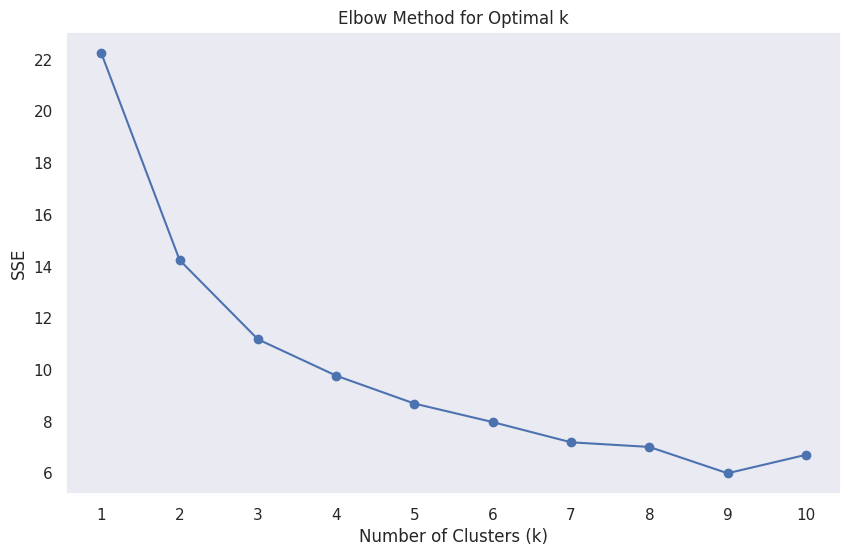

In [54]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, sse, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('SSE')
plt.xticks(k_values)
plt.grid()
plt.show()

In [55]:
optimal_k = 3 # 4

kmedoids = KMedoids(n_clusters=optimal_k, max_iter=10, random_state=42)
labels = kmedoids.fit_predict(X)
centroids = kmedoids.cluster_centers_

X['cluster'] = labels
df_merged['cluster'] = labels

In [56]:
df_merged.head()

,corridor_name,shelter_name,number_of_transaction,corridor_name_encoded,shelter_name_encoded,cluster
0,BLOK M - KOTA,ASEAN,33500,0,0,0
1,BLOK M - KOTA,BENDUNGAN HILIR,9428,0,2,1
2,BLOK M - KOTA,BLOK M,131797,0,4,1
3,BLOK M - KOTA,BUNDARAN HI ASTRA,148054,0,5,0
4,BLOK M - KOTA,BUNDARAN SENAYAN,84103,0,6,1


In [57]:
sse_final = kmedoids.inertia_
silhouette_avg = silhouette_score(X, X['cluster'])
dbi = davies_bouldin_score(X, X['cluster'])

print(f"SSE: {sse_final}")
print(f"Silhouette Score: {silhouette_avg}")
print(f"Davies-Bouldin Index: {dbi}")
print(f"Data Index: {df_merged.shape}")

SSE: 11.180969539203724
Silhouette Score: 0.798055556824476
Davies-Bouldin Index: 0.2671260215200959
Data Index: (75, 6)


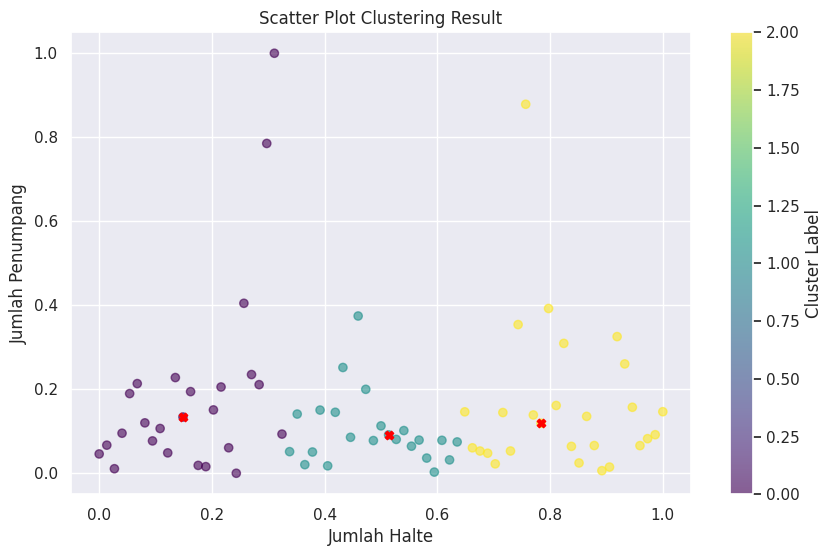

In [58]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
        X['shelter_name_encoded'],
        X['number_of_transaction'],
          c=X['cluster'],
          cmap='viridis',
          alpha=0.6)

plt.scatter(centroids[:, 0],
          centroids[:, 1],
          c='red',
          marker="X",
          label="Centroids")

plt.xlabel('Jumlah Halte')
plt.ylabel('Jumlah Penumpang')

cbar = plt.colorbar(scatter)
cbar.set_label('Cluster Label')

plt.title("Scatter Plot Clustering Result")
plt.show()

In [59]:
df_merged.head()

,corridor_name,shelter_name,number_of_transaction,corridor_name_encoded,shelter_name_encoded,cluster
0,BLOK M - KOTA,ASEAN,33500,0,0,0
1,BLOK M - KOTA,BENDUNGAN HILIR,9428,0,2,1
2,BLOK M - KOTA,BLOK M,131797,0,4,1
3,BLOK M - KOTA,BUNDARAN HI ASTRA,148054,0,5,0
4,BLOK M - KOTA,BUNDARAN SENAYAN,84103,0,6,1


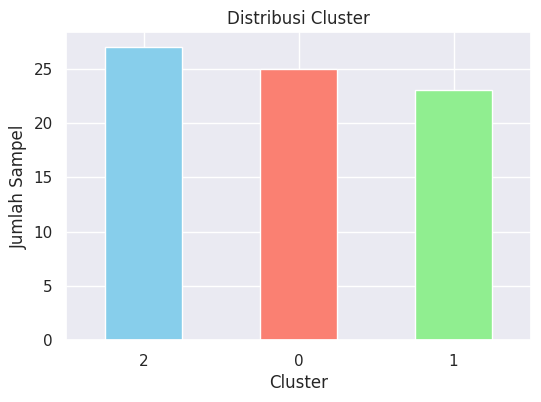

In [60]:
plt.figure(figsize=(6, 4))
df_merged['cluster'].value_counts().plot(kind='bar', color=['skyblue', 'salmon', 'lightgreen', 'gold', 'brown'])
plt.title('Distribusi Cluster')
plt.xlabel('Cluster')
plt.ylabel('Jumlah Sampel')
plt.xticks(rotation=0)
plt.show()

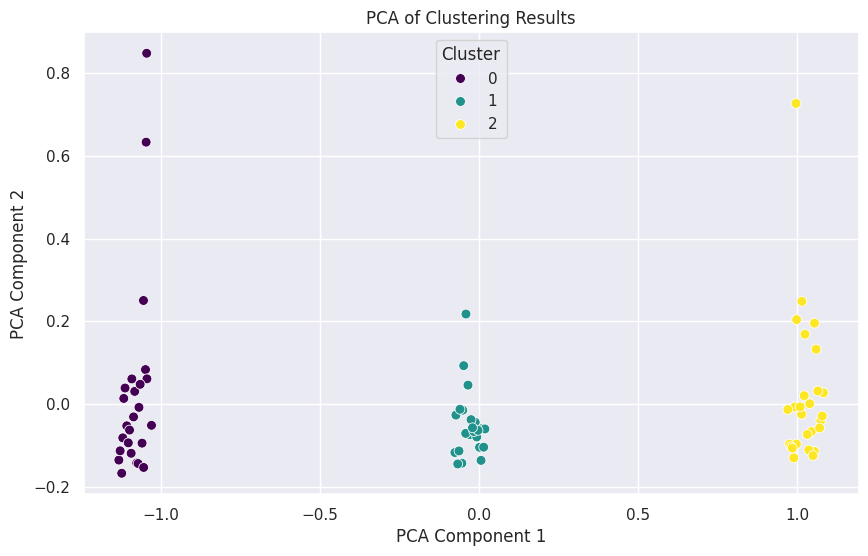

In [61]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

df_pca = pd.DataFrame(data=X_pca, columns=['PCA1', 'PCA2'])
df_pca['cluster'] = labels

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_pca, x='PCA1', y='PCA2', hue='cluster', palette='viridis', s=50)
plt.title('PCA of Clustering Results')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

In [62]:
df_merged = df_merged.drop(columns=['corridor_name_encoded', 'shelter_name_encoded'])
df_merged.to_csv("kmedoids_pagi_result.csv", index=False)

# KMEDOITS SORE PROGRAM

In [63]:
df_merged = pd.read_csv("new_rush_hour_sore.csv",  delimiter=";") # Data_merged_filtered_2
df_merged.head()

,corridor_name,shelter_name,number_of_transaction
0,BLOK M - KOTA,ASEAN,107803
1,BLOK M - KOTA,BENDUNGAN HILIR,41520
2,BLOK M - KOTA,BLOK M,357745
3,BLOK M - KOTA,BUNDARAN HI ASTRA,488951
4,BLOK M - KOTA,BUNDARAN SENAYAN,434460


## Feature Engginering

In [64]:
label_encoder = LabelEncoder()
df_merged['corridor_name_encoded'] = label_encoder.fit_transform(df_merged['corridor_name'])

df_merged.sample(n=5, random_state=42)

,corridor_name,shelter_name,number_of_transaction,corridor_name_encoded
4,BLOK M - KOTA,BUNDARAN SENAYAN,434460,0
63,PULOGADUNG 1 - HARMONI,PASAR CEMPAKA PUTIH,39556,3
10,BLOK M - KOTA,KOTA,205466,0
0,BLOK M - KOTA,ASEAN,107803,0
35,LEBAK BULUS - HARMONI,KEBON JERUK,124462,2


In [65]:
label_encoder.classes_

array(['BLOK M - KOTA', 'KALIDERES - PASAR BARU', 'LEBAK BULUS - HARMONI',
       'PULOGADUNG 1 - HARMONI'], dtype=object)

In [66]:
df_merged['shelter_name'].unique()

array(['ASEAN', 'BENDUNGAN HILIR', 'BLOK M', 'BUNDARAN HI ASTRA',
       'BUNDARAN SENAYAN', 'DUKUH ATAS', 'GLODOK', 'KARET',
       'KEBON SIRIH ARAH KOTA', 'KEJAKSAAN AGUNG', 'KOTA',
       'MANGGA BESAR ARAH KOTA', 'MASJID AGUNG', 'MH THAMRIN',
       'MONUMEN NASIONAL', 'POLDA METRO JAYA', 'SENAYAN BANK DKI',
       'TAMAN SARI', 'TELUK BETUNG', 'DAMAI', 'GROGOL', 'JELAMBAR',
       'JEMBATAN BARU', 'JEMBATAN GANTUNG', 'KALIDERES', 'PASAR BARU',
       'PESAKIH', 'PULO NANGKA', 'RAWA BUAYA', 'ROXY', 'SUMUR BOR',
       'TAMAN KOTA', 'DURI KEPA', 'GROGOL II', 'KEBAYORAN LAMA BUNGUR',
       'KEBON JERUK', 'KEDOYA ASSIDIQQIYAH', 'KEDOYA GREEN GARDEN',
       'KELAPA DUA SASAK', 'LEBAK BULUS', 'PERMATA HIJAU',
       'PERMATA HIJAU RS MEDIKA', 'PETOJO', 'PONDOK INDAH I',
       'PONDOK INDAH II', 'PONDOK PINANG', 'POS PENGUMBEN',
       'PS.KEBAYORAN LAMA', 'RS TARAKAN',
       'S. PARMAN PODOMORO CITY ARAH PLUIT', 'SIMPRUG',
       'TANAH KUSIR KODIM', 'TOMANG MANDALA', 'BALAI KOTA',

In [67]:
label_encoder = LabelEncoder()
df_merged['shelter_name_encoded'] = label_encoder.fit_transform(df_merged['shelter_name'])

df_merged.sample(n=10, random_state=42)

,corridor_name,shelter_name,number_of_transaction,corridor_name_encoded,shelter_name_encoded
4,BLOK M - KOTA,BUNDARAN SENAYAN,434460,0,6
63,PULOGADUNG 1 - HARMONI,PASAR CEMPAKA PUTIH,39556,3,40
10,BLOK M - KOTA,KOTA,205466,0,32
0,BLOK M - KOTA,ASEAN,107803,0,0
35,LEBAK BULUS - HARMONI,KEBON JERUK,124462,2,26
61,PULOGADUNG 1 - HARMONI,JUANDA,282951,3,22
28,KALIDERES - PASAR BARU,RAWA BUAYA,127477,1,59
12,BLOK M - KOTA,MASJID AGUNG,95578,0,36
69,PULOGADUNG 1 - HARMONI,PULO GADUNG,197357,3,56
64,PULOGADUNG 1 - HARMONI,PASAR SENEN,73053,3,41


In [68]:
df_merged.shape

(75, 5)

## Modeling

In [69]:
X = pd.concat([df_merged['shelter_name_encoded'].reset_index(drop=True), df_merged['number_of_transaction'].reset_index(drop=True)], axis=1)
X = X.sample(frac=1, random_state=42).reset_index(drop=True)

scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

X = pd.DataFrame(X_normalized, columns=X.columns)

X.head()

,shelter_name_encoded,number_of_transaction
0,0.081081,0.575139
1,0.540541,0.039015
2,0.432432,0.264256
3,0.000000,0.131668
4,0.351351,0.154284


In [70]:
sse = []

# Coba k dari 1 sampai 10

k_values = range(1, 11)
for k in k_values:
    kmedoids = KMedoids(n_clusters=k, random_state=42)
    kmedoids.fit(X)
    sse.append(kmedoids.inertia_)

In [71]:
print(sse)

[22.967925195223273, 14.956651139206102, 12.474586333176969, 10.694271484119586, 10.258256820464466, 8.843141540760179, 8.563096132354827, 8.374702361784752, 8.199179841182879, 7.761010897551474]


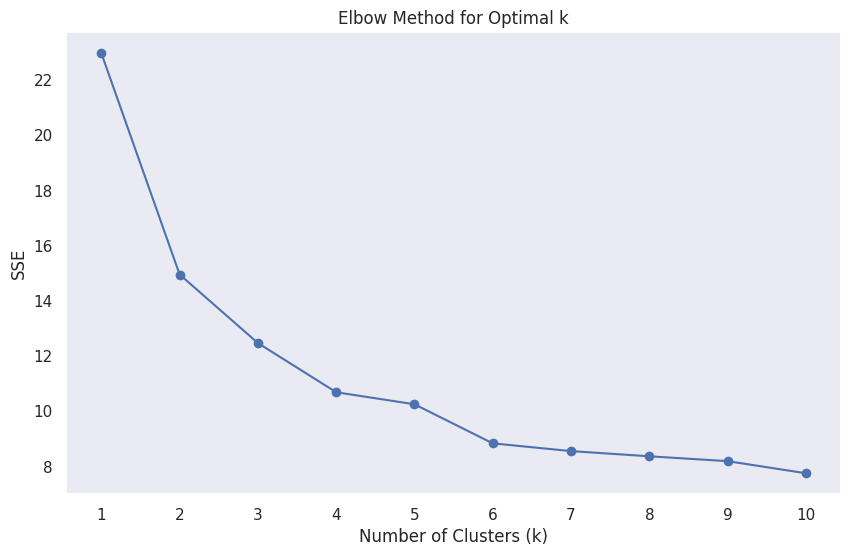

In [72]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, sse, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('SSE')
plt.xticks(k_values)
plt.grid()
plt.show()

In [73]:
optimal_k = 3 # 4

kmedoids = KMedoids(n_clusters=optimal_k, max_iter=10, random_state=42)
labels = kmedoids.fit_predict(X)
centroids = kmedoids.cluster_centers_

X['cluster'] = labels
df_merged['cluster'] = labels

In [74]:
df_merged.head()

,corridor_name,shelter_name,number_of_transaction,corridor_name_encoded,shelter_name_encoded,cluster
0,BLOK M - KOTA,ASEAN,107803,0,0,2
1,BLOK M - KOTA,BENDUNGAN HILIR,41520,0,2,1
2,BLOK M - KOTA,BLOK M,357745,0,4,1
3,BLOK M - KOTA,BUNDARAN HI ASTRA,488951,0,5,2
4,BLOK M - KOTA,BUNDARAN SENAYAN,434460,0,6,1


In [75]:
sse_final = kmedoids.inertia_
silhouette_avg = silhouette_score(X, X['cluster'])
dbi = davies_bouldin_score(X, X['cluster'])

print(f"SSE: {sse_final}")
print(f"Silhouette Score: {silhouette_avg}")
print(f"Davies-Bouldin Index: {dbi}")
print(f"Data Index: {df_merged.shape}")

SSE: 12.474586333176969
Silhouette Score: 0.7781267263375853
Davies-Bouldin Index: 0.3127877073813639
Data Index: (75, 6)


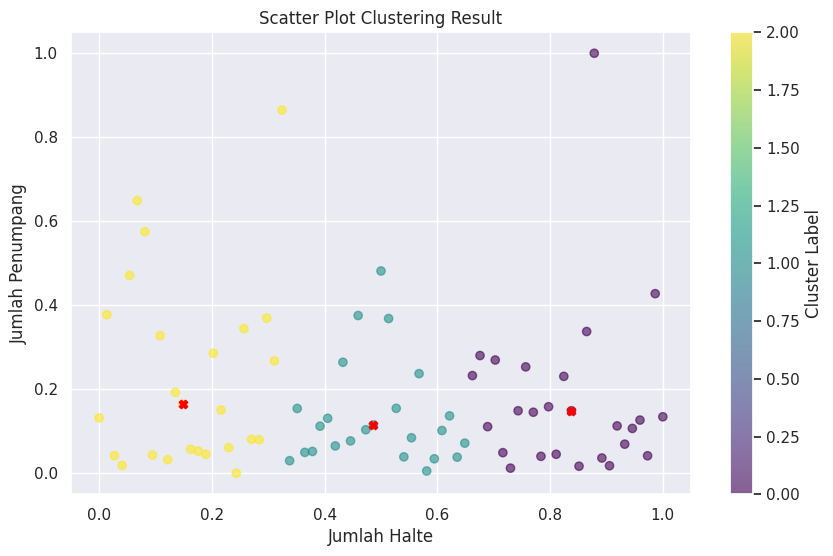

In [76]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
        X['shelter_name_encoded'],
        X['number_of_transaction'],
          c=X['cluster'],
          cmap='viridis',
          alpha=0.6)

plt.scatter(centroids[:, 0],
          centroids[:, 1],
          c='red',
          marker="X",
          label="Centroids")

plt.xlabel('Jumlah Halte')
plt.ylabel('Jumlah Penumpang')

cbar = plt.colorbar(scatter)
cbar.set_label('Cluster Label')

plt.title("Scatter Plot Clustering Result")
plt.show()

In [77]:
df_merged.head()

,corridor_name,shelter_name,number_of_transaction,corridor_name_encoded,shelter_name_encoded,cluster
0,BLOK M - KOTA,ASEAN,107803,0,0,2
1,BLOK M - KOTA,BENDUNGAN HILIR,41520,0,2,1
2,BLOK M - KOTA,BLOK M,357745,0,4,1
3,BLOK M - KOTA,BUNDARAN HI ASTRA,488951,0,5,2
4,BLOK M - KOTA,BUNDARAN SENAYAN,434460,0,6,1


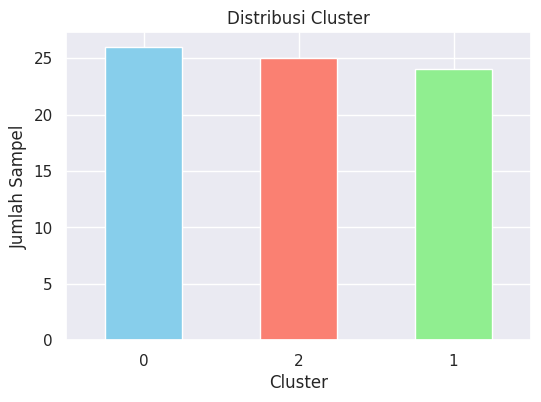

In [78]:
plt.figure(figsize=(6, 4))
df_merged['cluster'].value_counts().plot(kind='bar', color=['skyblue', 'salmon', 'lightgreen', 'gold', 'brown'])
plt.title('Distribusi Cluster')
plt.xlabel('Cluster')
plt.ylabel('Jumlah Sampel')
plt.xticks(rotation=0)
plt.show()

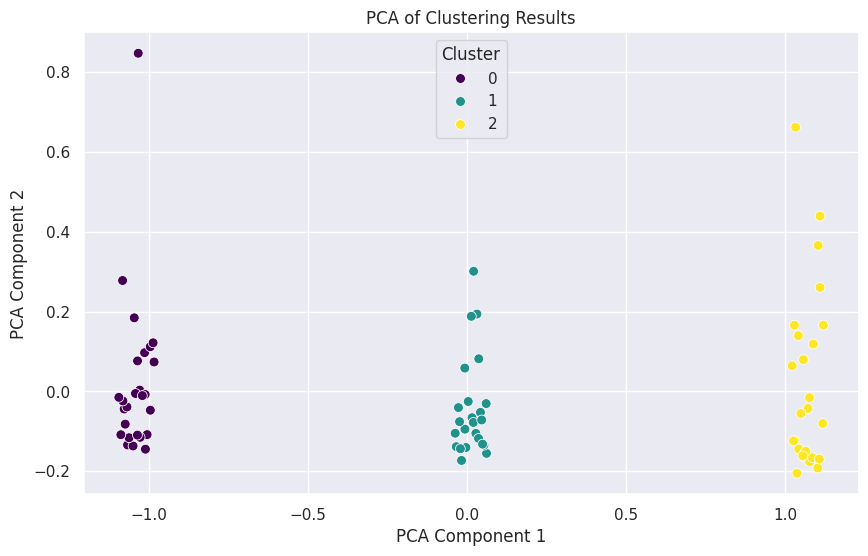

In [79]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

df_pca = pd.DataFrame(data=X_pca, columns=['PCA1', 'PCA2'])
df_pca['cluster'] = labels

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_pca, x='PCA1', y='PCA2', hue='cluster', palette='viridis', s=50)
plt.title('PCA of Clustering Results')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

In [80]:
df_merged = df_merged.drop(columns=['corridor_name_encoded', 'shelter_name_encoded'])
df_merged.to_csv("kmedoids_sore_result.csv", index=False)